# ML-6 Non-Hierarchical Clustering

# Import Library

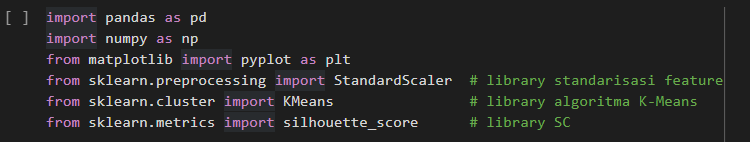

In [ ]:
# Tulis di sini
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Menginstal library machine learning visualization: [yellowbrick](https://www.scikit-yb.org/en/latest/).

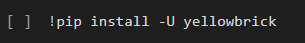

In [ ]:
# Tulis di sini
!pip install -U yellowbrick

Import library [KElbowVisualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html).

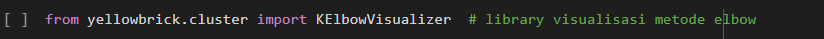

In [ ]:
# Tulis di sini
from yellowbrick.cluster import KElbowVisualizer

# Load Dataset

Download dataset [di sini](https://drive.google.com/file/d/1kQhSkVx2BYYRHeGZtjjfgZTOMSf9YjhY/view?usp=sharing)

Pada hands-on ini, kita masih menggunakan dataset Mall_Customers.csv.

Berbeda dengan materi sebelumnya, kali ini, kita akan lakukan Customer Segmentation menggunakan algoritma K-Means.

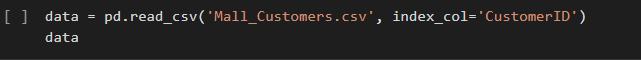

In [ ]:
# Tulis di sini
data = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
data

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
209,Female,35,1207,79
210,Female,45,126,182
211,Male,32,126,174


Memeriksa kelengkapan dataset.

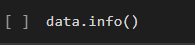

In [ ]:
# Tulis di sini
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 1 to 213
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         240 non-null    object
 1   Age            240 non-null    int64 
 2   AnnualIncome   240 non-null    int64 
 3   SpendingScore  240 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.4+ KB


Kita hanya memilih dua variable saja, yakni **AnnualIncome** dan **SpendingScore**.

> Note: Jika kita memilih variable Gender, maka kita perlu melakukan preprocessing terlebih dahulu.

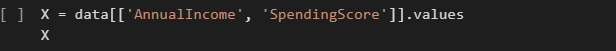

In [ ]:
# Tulis di sini
X = data[['AnnualIncome', 'SpendingScore']].values
X

array([[  15,   39],
       [  15,   81],
       [  16,    6],
       [  16,   77],
       [  17,   40],
       [  17,   76],
       [  18,    6],
       [  18,   94],
       [  19,    3],
       [  19,   72],
       [  19,   14],
       [  19,   99],
       [  20,   15],
       [  20,   77],
       [  20,   13],
       [  20,   79],
       [  21,   35],
       [  21,   66],
       [  23,   29],
       [  23,   98],
       [  24,   35],
       [  24,   73],
       [  25,    5],
       [  25,   73],
       [  28,   14],
       [  28,   82],
       [  28,   32],
       [  28,   61],
       [  29,   31],
       [  29,   87],
       [  30,    4],
       [  30,   73],
       [  33,    4],
       [  33,   92],
       [  33,   14],
       [  33,   81],
       [  34,   17],
       [  34,   73],
       [  37,   26],
       [  37,   75],
       [  38,   35],
       [  38,   92],
       [  39,   36],
       [  39,   61],
       [  39,   28],
       [  39,   65],
       [  40,   55],
       [  40,

Karena standar besar/kecil di kedua variabel berbeda, maka kita perlu melakukan standarisasi terlebih dahulu menggunakan `StandardScaler`.

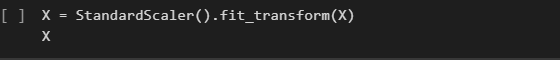

In [ ]:
# Tulis di sini
X = StandardScaler().fit_transform(X)
X

array([[-4.31393298e-01, -4.21372977e-01],
       [-4.31393298e-01,  9.16824758e-01],
       [-4.24485019e-01, -1.47281405e+00],
       [-4.24485019e-01,  7.89377354e-01],
       [-4.17576739e-01, -3.89511126e-01],
       [-4.17576739e-01,  7.57515504e-01],
       [-4.10668459e-01, -1.47281405e+00],
       [-4.10668459e-01,  1.33102882e+00],
       [-4.03760179e-01, -1.56839961e+00],
       [-4.03760179e-01,  6.30068100e-01],
       [-4.03760179e-01, -1.21791925e+00],
       [-4.03760179e-01,  1.49033807e+00],
       [-3.96851899e-01, -1.18605740e+00],
       [-3.96851899e-01,  7.89377354e-01],
       [-3.96851899e-01, -1.24978110e+00],
       [-3.96851899e-01,  8.53101056e-01],
       [-3.89943619e-01, -5.48820381e-01],
       [-3.89943619e-01,  4.38896995e-01],
       [-3.76127059e-01, -7.39991486e-01],
       [-3.76127059e-01,  1.45847622e+00],
       [-3.69218779e-01, -5.48820381e-01],
       [-3.69218779e-01,  6.61929951e-01],
       [-3.62310499e-01, -1.50467591e+00],
       [-3.

# Metode Elbow

Sebelum men-training model K-Means, sebaiknya kita mencari nilai K yang paling baik/optimal terlebih dahulu.

Nilai ini bisa kita cari menggunakan Metode Elbow atau `KElbowVisualizer` pada Python.



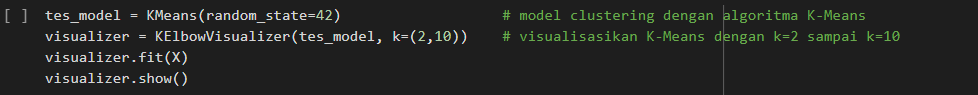

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

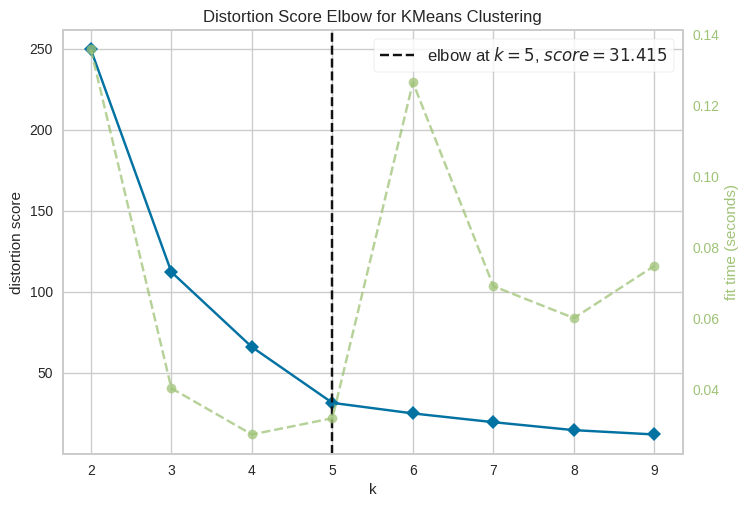

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Tulis di sini
tes_model = KMeans(random_state=42)
visualizer = KElbowVisualizer(tes_model, k=(2,10))
visualizer.fit(X)
visualizer.show()

Berdasarkan hasil Metode Elbow, Titik Elbow berada pada K=5.

Maka nilai K terbaik/optimal adalah 5.

# Modeling

Selanjutnya kita lakukan training model menggunakan algoritma K-Means dengan:
- cluster bejumlah 5 (K=5)
- random state bernilai 42

Random state berguna untuk mengontrol ke-random-an inisiasi centroid.


Kita juga bisa men-tuning hyperparameter K-Means lainnya. Baca dokumentasi lengkapnya [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

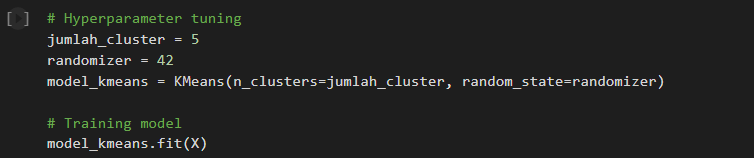

In [ ]:
# Tulis di sini
jumlah_cluster = 5
randomizer = 42
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=randomizer)

model_kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

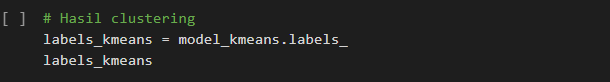

In [ ]:
# Tulis di sini
labels_kmeans = model_kmeans.labels_
labels_kmeans

array([4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 4, 1,
       0, 1, 0, 1, 4, 4, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 4, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1,
       4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 4, 4, 4, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 0, 1, 2, 2, 2, 2, 3, 3, 3, 3],
      dtype=int32)

Karena kita menentukan K=5 (cluster berjumlah 5), maka kita akan mendapat 5 centroid.

Informasi (letak) tiap centroid bisa kita akses menggunakan method `cluster_centers_`.

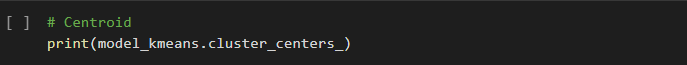

In [ ]:
# Tulis di sini
print(model_kmeans.cluster_centers_)

[[-0.09894748 -1.20506271]
 [-0.11772005  0.91897759]
 [ 7.52694521 -0.11868539]
 [ 0.37342132  4.15876808]
 [-0.17079383 -0.15322869]]


# Evaluasi Model

Ada beberapa metode yang bisa kita gunakan untuk mengevaluasi model clustering, antara lain:
1. Melihat dendrogram
2. Metode elbow
3. Visualisasi data
4. Silhouette Coefficient (SC)

Dendrogram digunakan pada model AHC.
Sedangkan, metode elbow sudah kita gunakan untuk menentukan nilai K terbaik.

Selanjutnya, kita akan mengevaluasi model clustering menggunakan visualisasi data dan SC.

## Visualisasi Hasil Clustering (Visualisasi Data)

Kita bisa memvisualisasikan hasil clustering dan centroid secara bersamaan menggunaan scatter plot.

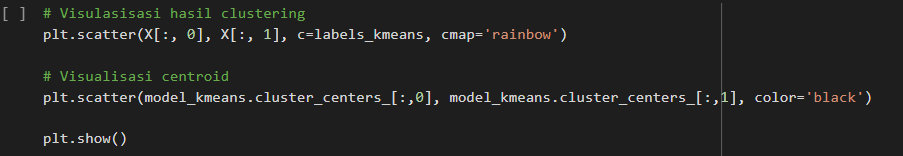

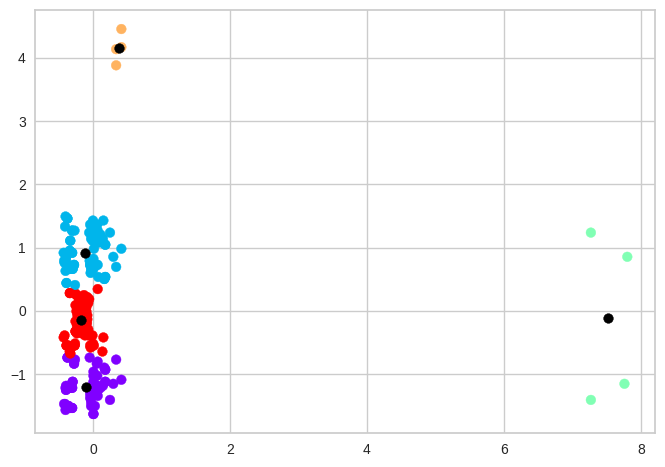

In [ ]:
# Tulis di sini
plt.scatter(X[:, 0], X[:,1], c=labels_kmeans, cmap='rainbow')

plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], color='black')

plt.show()

Terlihat hasil clustering sudah cukup bagus.

---

**Note**:
- Kita bisa memvisualisasikan dataset secara 2D karena dataset tersebut hanya terdiri dari dua variable/feature, yakni **AnnualIncome** dan **SpendingScore**.
- Jika dataset kita terdiri dari tiga variable, maka kita masih bisa memvisualisasikan dataset secara 3D.
- Namun, kita tidak akan bisa memvisualisasikan dataset dengan jumlah variable lebih dari tiga, karena visualisasinya lebih dari 3D.
- Salah satu solusi visualisasi dataset dengan jumlah variable >3 adalah reduksi dimensi (dimensionality reduction).

Materi dimensionality reduction akan kita pelajari pada domain Data Science.

## Silhouette Coefficient

Kita bisa menggunakan `silhouette_score` untuk mendapat Silhouette Score model yang telah kita training.

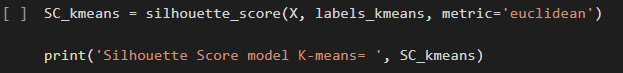

In [ ]:
# Tulis si sini
SC_kmeans = silhouette_score(X, labels_kmeans, metric='euclidean')

print('Silhouette Score model K-means= ', SC_kmeans)

Silhouette Score model K-means=  0.5726323363898457


Semakin Silhouette Score mendekati 1, maka model clustering akan semakin bagus.

Berdasarkan Silhouette Score, model K-Means yang telah kita training sudah cukup bagus.

Alangkah baiknya jika kita men-training lebih dari satu model clustering dengan berbagai algoritma dan tuning hyperparameter.

Kemudian, kita bandingkan Silhouette Score tiap model untuk mengetahui mana model terbagus.

# Kesimpulan

Simpan hasil clustering ke dalam dataset.

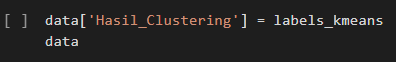

In [ ]:
# Tulis di sini
data['Hasil_Clustering'] = labels_kmeans
data

,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
CustomerID,,,,,
1,Male,19,15,39,4
2,Male,21,15,81,1
3,Female,20,16,6,0
4,Female,23,16,77,1
5,Female,31,17,40,4
...,...,...,...,...,...
209,Female,35,1207,79,2
210,Female,45,126,182,3
211,Male,32,126,174,3


**Contoh**:

Menghitung rata-rata tiap cluster untuk menarik kesimpulan.

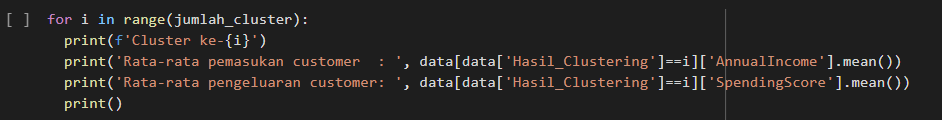

In [ ]:
# Tulis di sini
for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer   : ', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer : ', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())
  print()

Cluster ke-0
Rata-rata pemasukan customer   :  63.12280701754386
Rata-rata pengeluaran customer :  14.403508771929825

Cluster ke-1
Rata-rata pemasukan customer   :  60.4054054054054
Rata-rata pengeluaran customer :  81.06756756756756

Cluster ke-2
Rata-rata pemasukan customer   :  1167.0
Rata-rata pengeluaran customer :  48.5

Cluster ke-3
Rata-rata pemasukan customer   :  131.5
Rata-rata pengeluaran customer :  182.75

Cluster ke-4
Rata-rata pemasukan customer   :  52.722772277227726
Rata-rata pengeluaran customer :  47.415841584158414



Bisa kita simpulkan bahwa :    
- Cluster 0 adalah kelompok customer menengah ke bawah yang hemat (pengeluarannya sangat kecil)
- Cluster 1 adalah kelompok customer menengah ke bawah yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 2 adalah kelompok customer tingkat atas yang hemat (pengeluarannya sangat kecil)
- Cluster 3 adalah kelompok customer menengah ke atas yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 4 adalah kelompok customer menengah ke bawah yang boros (pengeluaran hampir sama dengan pemasukan)

---

**OPEN DISCUSSION**

Jika kamu adalah pemilik toko kredit dan akan menawarkan kredit mobil, cluster manakah yang menurutmu tepat?



# Exercise (Latihan)

Boleh pilih salah satu activity atau lakukan keduanya.

## Activity 1

- Gunakan dataset Mall_Customers.csv
- Gunakan variable Age, AnnualIncome, dan SpendingScore
- Lakukan clustering menggunakan model AHC dan K-Means
- Tentukan nilai K terbaik untuk setiap model
- Bandingkan SC model K-Means dengan AHC
- Tarik kesimpulan activity dan paparkan mana model terbaik

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [3]:
!pip install -U yellowbrick

In [4]:
from yellowbrick.cluster import KElbowVisualizer

In [5]:
data = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
data

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
209,Female,35,1207,79
210,Female,45,126,182
211,Male,32,126,174


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 1 to 213
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         240 non-null    object
 1   Age            240 non-null    int64 
 2   AnnualIncome   240 non-null    int64 
 3   SpendingScore  240 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.4+ KB


In [7]:
X = data[['Age','AnnualIncome', 'SpendingScore']].values
X

array([[  19,   15,   39],
       [  21,   15,   81],
       [  20,   16,    6],
       [  23,   16,   77],
       [  31,   17,   40],
       [  22,   17,   76],
       [  35,   18,    6],
       [  23,   18,   94],
       [  64,   19,    3],
       [  30,   19,   72],
       [  67,   19,   14],
       [  35,   19,   99],
       [  58,   20,   15],
       [  24,   20,   77],
       [  37,   20,   13],
       [  22,   20,   79],
       [  35,   21,   35],
       [  20,   21,   66],
       [  52,   23,   29],
       [  35,   23,   98],
       [  35,   24,   35],
       [  25,   24,   73],
       [  46,   25,    5],
       [  31,   25,   73],
       [  54,   28,   14],
       [  29,   28,   82],
       [  45,   28,   32],
       [  35,   28,   61],
       [  40,   29,   31],
       [  23,   29,   87],
       [  60,   30,    4],
       [  21,   30,   73],
       [  53,   33,    4],
       [  18,   33,   92],
       [  49,   33,   14],
       [  21,   33,   81],
       [  42,   34,   17],
 

In [8]:
scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)
X

array([[-5.63212969e-01, -4.31393298e-01, -4.21372977e-01],
       [-5.19454111e-01, -4.31393298e-01,  9.16824758e-01],
       [-5.41333540e-01, -4.24485019e-01, -1.47281405e+00],
       [-4.75695253e-01, -4.24485019e-01,  7.89377354e-01],
       [-3.00659821e-01, -4.17576739e-01, -3.89511126e-01],
       [-4.97574682e-01, -4.17576739e-01,  7.57515504e-01],
       [-2.13142105e-01, -4.10668459e-01, -1.47281405e+00],
       [-4.75695253e-01, -4.10668459e-01,  1.33102882e+00],
       [ 4.21361338e-01, -4.03760179e-01, -1.56839961e+00],
       [-3.22539250e-01, -4.03760179e-01,  6.30068100e-01],
       [ 4.86999625e-01, -4.03760179e-01, -1.21791925e+00],
       [-2.13142105e-01, -4.03760179e-01,  1.49033807e+00],
       [ 2.90084763e-01, -3.96851899e-01, -1.18605740e+00],
       [-4.53815824e-01, -3.96851899e-01,  7.89377354e-01],
       [-1.69383247e-01, -3.96851899e-01, -1.24978110e+00],
       [-4.97574682e-01, -3.96851899e-01,  8.53101056e-01],
       [-2.13142105e-01, -3.89943619e-01

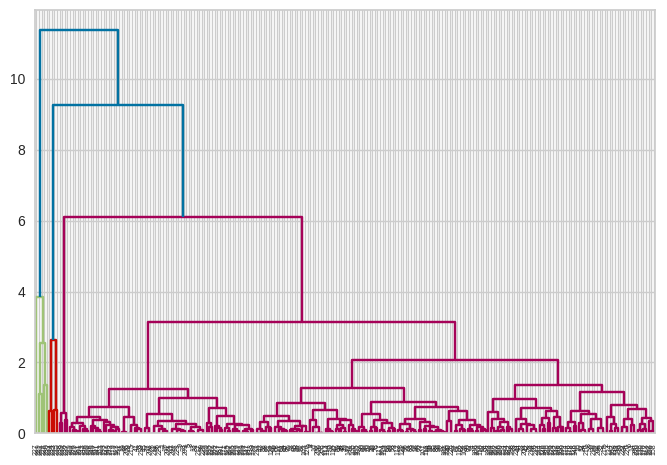

In [12]:
dendrogram = sch.dendrogram(sch.linkage(X, method='complete'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

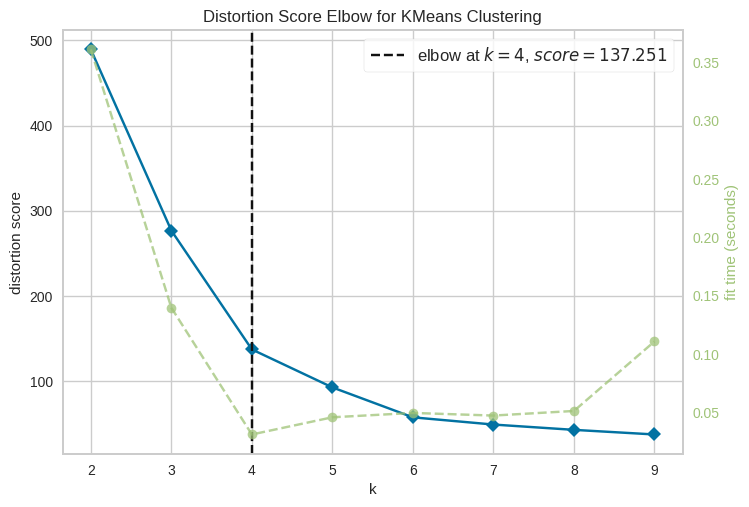

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
tes_model = KMeans(random_state=42)
visualizer = KElbowVisualizer(tes_model, k=(2,10))
visualizer.fit(X)
visualizer.show()

In [16]:
jumlah_cluster = 4
persamaan_jarak = 'euclidean'
metode_linkage = 'complete'

model_AHC = AgglomerativeClustering(n_clusters=jumlah_cluster, affinity=persamaan_jarak, linkage=metode_linkage)

model_AHC.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [17]:
jumlah_cluster = 5
randomizer = 42
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=randomizer)

model_kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [18]:
labels_agglo = model_AHC.labels_
labels_agglo

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 3, 3, 3, 3])

In [19]:
labels_kmeans = model_kmeans.labels_
labels_kmeans

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 3, 3, 3, 3, 3, 1, 1, 1, 1, 4, 4, 4, 4],
      dtype=int32)

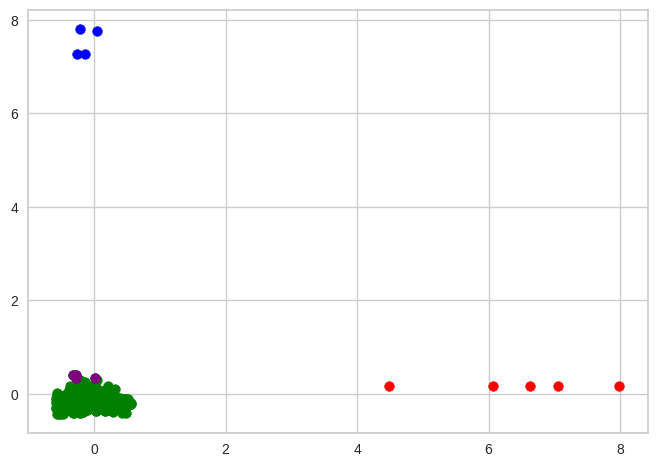

In [20]:
colors = ['red', 'green', 'blue', 'purple', 'magenta', 'orange', 'yellow']

for i in range(jumlah_cluster):
  plt.scatter(X[labels_agglo==i, 0], X[labels_agglo==i, 1], s=50, marker='o', color=colors[i])

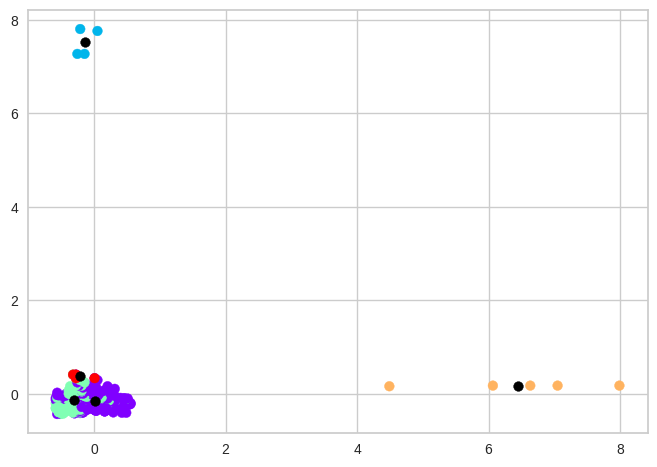

In [21]:
plt.scatter(X[:, 0], X[:,1], c=labels_kmeans, cmap='rainbow')

plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], color='black')

plt.show()

In [23]:
data['Hasil_Clustering']= labels_agglo
data

,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
CustomerID,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,1
3,Female,20,16,6,1
4,Female,23,16,77,1
5,Female,31,17,40,1
...,...,...,...,...,...
209,Female,35,1207,79,2
210,Female,45,126,182,3
211,Male,32,126,174,3


In [24]:
for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer : ', data[data['Hasil_Clustering']==i]['Age'].mean())
  print('Rata-rata pemasukan customer : ', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer : ', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())
  print()

Cluster ke-0
Rata-rata pemasukan customer :  339.4
Rata-rata pemasukan customer :  102.6
Rata-rata pengeluaran customer :  52.4

Cluster ke-1
Rata-rata pemasukan customer :  38.541850220264315
Rata-rata pemasukan customer :  56.74008810572687
Rata-rata pengeluaran customer :  49.986784140969164

Cluster ke-2
Rata-rata pemasukan customer :  38.25
Rata-rata pemasukan customer :  1167.0
Rata-rata pengeluaran customer :  48.5

Cluster ke-3
Rata-rata pemasukan customer :  34.75
Rata-rata pemasukan customer :  131.5
Rata-rata pengeluaran customer :  182.75

Cluster ke-4
Rata-rata pemasukan customer :  nan
Rata-rata pemasukan customer :  nan
Rata-rata pengeluaran customer :  nan



In [25]:
data['Hasil_Clustering'] = labels_kmeans
data

,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
CustomerID,,,,,
1,Male,19,15,39,0
2,Male,21,15,81,2
3,Female,20,16,6,0
4,Female,23,16,77,2
5,Female,31,17,40,0
...,...,...,...,...,...
209,Female,35,1207,79,1
210,Female,45,126,182,4
211,Male,32,126,174,4


In [26]:
data['Hasil_Clustering'] = labels_kmeans
data

,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
CustomerID,,,,,
1,Male,19,15,39,0
2,Male,21,15,81,2
3,Female,20,16,6,0
4,Female,23,16,77,2
5,Female,31,17,40,0
...,...,...,...,...,...
209,Female,35,1207,79,1
210,Female,45,126,182,4
211,Male,32,126,174,4


In [27]:
for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer   : ', data[data['Hasil_Clustering']==i]['Age'].mean())
  print('Rata-rata pemasukan customer   : ', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer : ', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())
  print()

Cluster ke-0
Rata-rata pemasukan customer   :  45.131147540983605
Rata-rata pemasukan customer   :  56.368852459016395
Rata-rata pengeluaran customer :  29.975409836065573

Cluster ke-1
Rata-rata pemasukan customer   :  38.25
Rata-rata pemasukan customer   :  1167.0
Rata-rata pengeluaran customer :  48.5

Cluster ke-2
Rata-rata pemasukan customer   :  30.885714285714286
Rata-rata pemasukan customer   :  57.17142857142857
Rata-rata pengeluaran customer :  73.23809523809524

Cluster ke-3
Rata-rata pemasukan customer   :  339.4
Rata-rata pemasukan customer   :  102.6
Rata-rata pengeluaran customer :  52.4

Cluster ke-4
Rata-rata pemasukan customer   :  34.75
Rata-rata pemasukan customer   :  131.5
Rata-rata pengeluaran customer :  182.75



## Activity 2

1. Buat kelompok
2. Carilah dataset untuk kasus clustering di sekitarmu atau di internet
3. Lakukan clustering menggunakan algortima K-Means (ikuti step pada hands-on ini)
4. Buat kesimpulan clustering
5. Kumpulkan ke HC

In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [29]:
!pip install -U yellowbrick

In [30]:
from yellowbrick.cluster import KElbowVisualizer

In [32]:
data = pd.read_csv('onlinefoods.csv', index_col='Gender')
data

,Age,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
Gender,,,,,,,,,,,,
Female,20,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
Female,24,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
Male,22,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
Female,22,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
Male,22,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
Female,23,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
Female,23,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
Female,22,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388 entries, Female to Male
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Marital Status              388 non-null    object 
 2   Occupation                  388 non-null    object 
 3   Monthly Income              388 non-null    object 
 4   Educational Qualifications  388 non-null    object 
 5   Family size                 388 non-null    int64  
 6   latitude                    388 non-null    float64
 7   longitude                   388 non-null    float64
 8   Pin code                    388 non-null    int64  
 9   Output                      388 non-null    object 
 10  Feedback                    388 non-null    object 
 11  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 47.5+ KB


In [35]:
X = data[['latitude', 'longitude']].values
X

array([[12.9766, 77.5993],
       [12.977 , 77.5773],
       [12.9551, 77.6593],
       [12.9473, 77.5616],
       [12.985 , 77.5533],
       [12.9299, 77.6848],
       [12.977 , 77.5773],
       [12.9828, 77.6131],
       [12.9766, 77.5993],
       [12.9854, 77.7081],
       [12.985 , 77.5533],
       [12.977 , 77.5773],
       [12.8988, 77.5764],
       [12.977 , 77.5773],
       [12.9438, 77.5738],
       [12.8893, 77.6399],
       [12.9783, 77.6408],
       [12.982 , 77.6256],
       [12.8988, 77.5764],
       [12.9783, 77.6408],
       [12.977 , 77.5773],
       [13.0298, 77.6047],
       [12.9983, 77.6409],
       [12.9925, 77.5633],
       [12.9306, 77.5434],
       [12.982 , 77.6256],
       [12.9353, 77.5585],
       [12.9155, 77.5135],
       [12.9854, 77.7081],
       [13.0019, 77.5713],
       [12.9698, 77.75  ],
       [12.9783, 77.6408],
       [12.9261, 77.6221],
       [12.985 , 77.5533],
       [12.9119, 77.6446],
       [12.9306, 77.5434],
       [12.977 , 77.5773],
 

In [36]:
X = StandardScaler().fit_transform(X)
X

array([[ 0.10222413, -0.01675911],
       [ 0.11122668, -0.44571189],
       [-0.38166266,  1.15311211],
       [-0.55721229, -0.75182819],
       [ 0.29127758, -0.91366037],
       [-0.948823  ,  1.65030737],
       [ 0.11122668, -0.44571189],
       [ 0.24176358,  0.25231127],
       [ 0.10222413, -0.01675911],
       [ 0.30028012,  2.10460736],
       [ 0.29127758, -0.91366037],
       [ 0.11122668, -0.44571189],
       [-1.64877087, -0.46325996],
       [ 0.11122668, -0.44571189],
       [-0.63598456, -0.51395438],
       [-1.86258131,  0.77485375],
       [ 0.14048495,  0.79240182],
       [ 0.22375849,  0.49603444],
       [-1.64877087, -0.46325996],
       [ 0.14048495,  0.79240182],
       [ 0.11122668, -0.44571189],
       [ 1.29956261,  0.0885293 ],
       [ 0.5906122 ,  0.7943516 ],
       [ 0.46007529, -0.71868184],
       [-0.93306854, -1.10668913],
       [ 0.22375849,  0.49603444],
       [-0.82728864, -0.81227154],
       [-1.27291462, -1.68967495],
       [ 0.30028012,

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

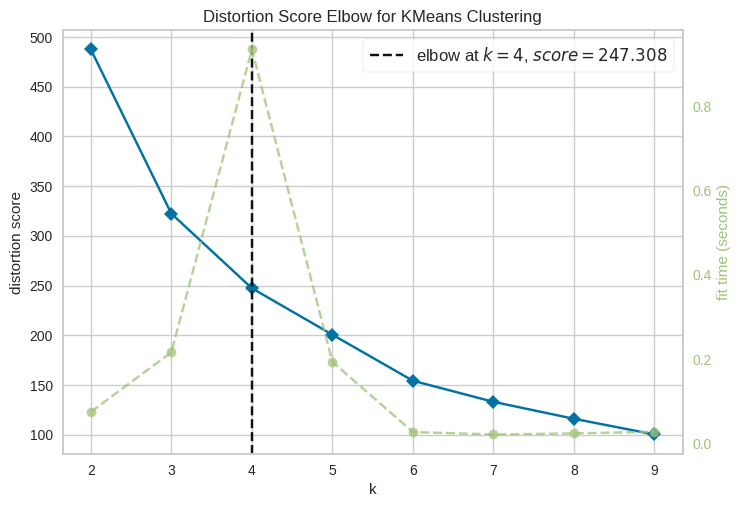

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
tes_model = KMeans(random_state=42)
visualizer = KElbowVisualizer(tes_model, k=(2,10))
visualizer.fit(X)
visualizer.show()

In [38]:
jumlah_cluster = 4
randomizer = 42
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=randomizer)

model_kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [40]:
labels_kmeans = model_kmeans.labels_
labels_kmeans

array([0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 2, 1, 1, 2, 1, 0, 3,
       1, 0, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 3, 2, 0, 0,
       2, 3, 3, 2, 0, 2, 0, 2, 0, 3, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 0,
       0, 3, 3, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 2, 1, 1, 2, 1, 0,
       0, 2, 0, 1, 0, 1, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 2, 1, 0, 0, 0, 2, 3, 3, 0, 0, 0, 0, 0, 3, 1, 0, 0, 3, 1, 1,
       1, 3, 0, 0, 0, 2, 2, 2, 1, 0, 0, 3, 3, 0, 3, 3, 3, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 2, 2, 2, 2, 2,
       2, 3, 2, 0, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 0, 1, 2, 1, 3, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 0, 0, 2, 3, 3, 0, 2, 1, 1, 1,
       1, 3, 3, 3, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0,
       1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 3, 3, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 1,

In [41]:
print(model_kmeans.cluster_centers_)

[[ 0.25978347 -0.50171691]
 [-0.08482625  1.32559012]
 [-1.21241949 -0.25638987]
 [ 1.76279357 -0.73259031]]


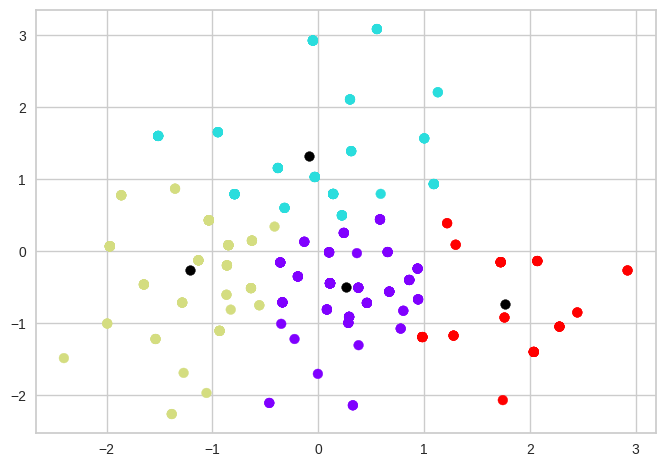

In [42]:
plt.scatter(X[:, 0], X[:,1], c=labels_kmeans, cmap='rainbow')

plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], color='black')

plt.show()

In [43]:
SC_kmeans = silhouette_score(X, labels_kmeans, metric='euclidean')

print('Silhouette Score model K-means= ', SC_kmeans)

Silhouette Score model K-means=  0.3912967309051509


In [44]:
data['Hasil_Clustering'] = labels_kmeans
data

,Age,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12,Hasil_Clustering
Gender,,,,,,,,,,,,,
Female,20,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes,0
Female,24,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes,0
Male,22,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes,1
Female,22,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes,2
Male,22,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Female,23,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes,0
Female,23,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes,1
Female,22,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes,0


In [46]:
for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer   : ', data[data['Hasil_Clustering']==i]['latitude'].mean())
  print('Rata-rata pengeluaran customer : ', data[data['Hasil_Clustering']==i]['longitude'].mean())
  print()

Cluster ke-0
Rata-rata pemasukan customer   :  12.983600657894739
Rata-rata pengeluaran customer :  77.57442763157894

Cluster ke-1
Rata-rata pemasukan customer   :  12.968289
Rata-rata pengeluaran customer :  77.66814600000001

Cluster ke-2
Rata-rata pemasukan customer   :  12.918187912087907
Rata-rata pengeluaran customer :  77.5870098901099

Cluster ke-3
Rata-rata pemasukan customer   :  13.050382222222225
Rata-rata pengeluaran customer :  77.56258666666669

